# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv('/home/ishita/Documents/datasets/diabetes.csv')

# Descriptive Analysis

In [4]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
dataset.shape

(768, 9)

In [6]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
dataset.value_counts('Outcome')

Outcome
0    500
1    268
dtype: int64

# Data Visualization

<AxesSubplot:xlabel='Outcome', ylabel='count'>

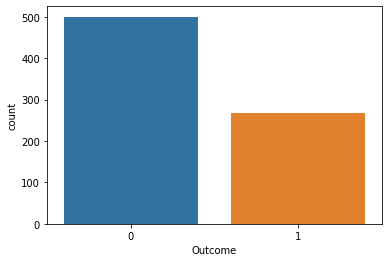

In [9]:
#counter plot
sns.countplot(x = 'Outcome',data = dataset)

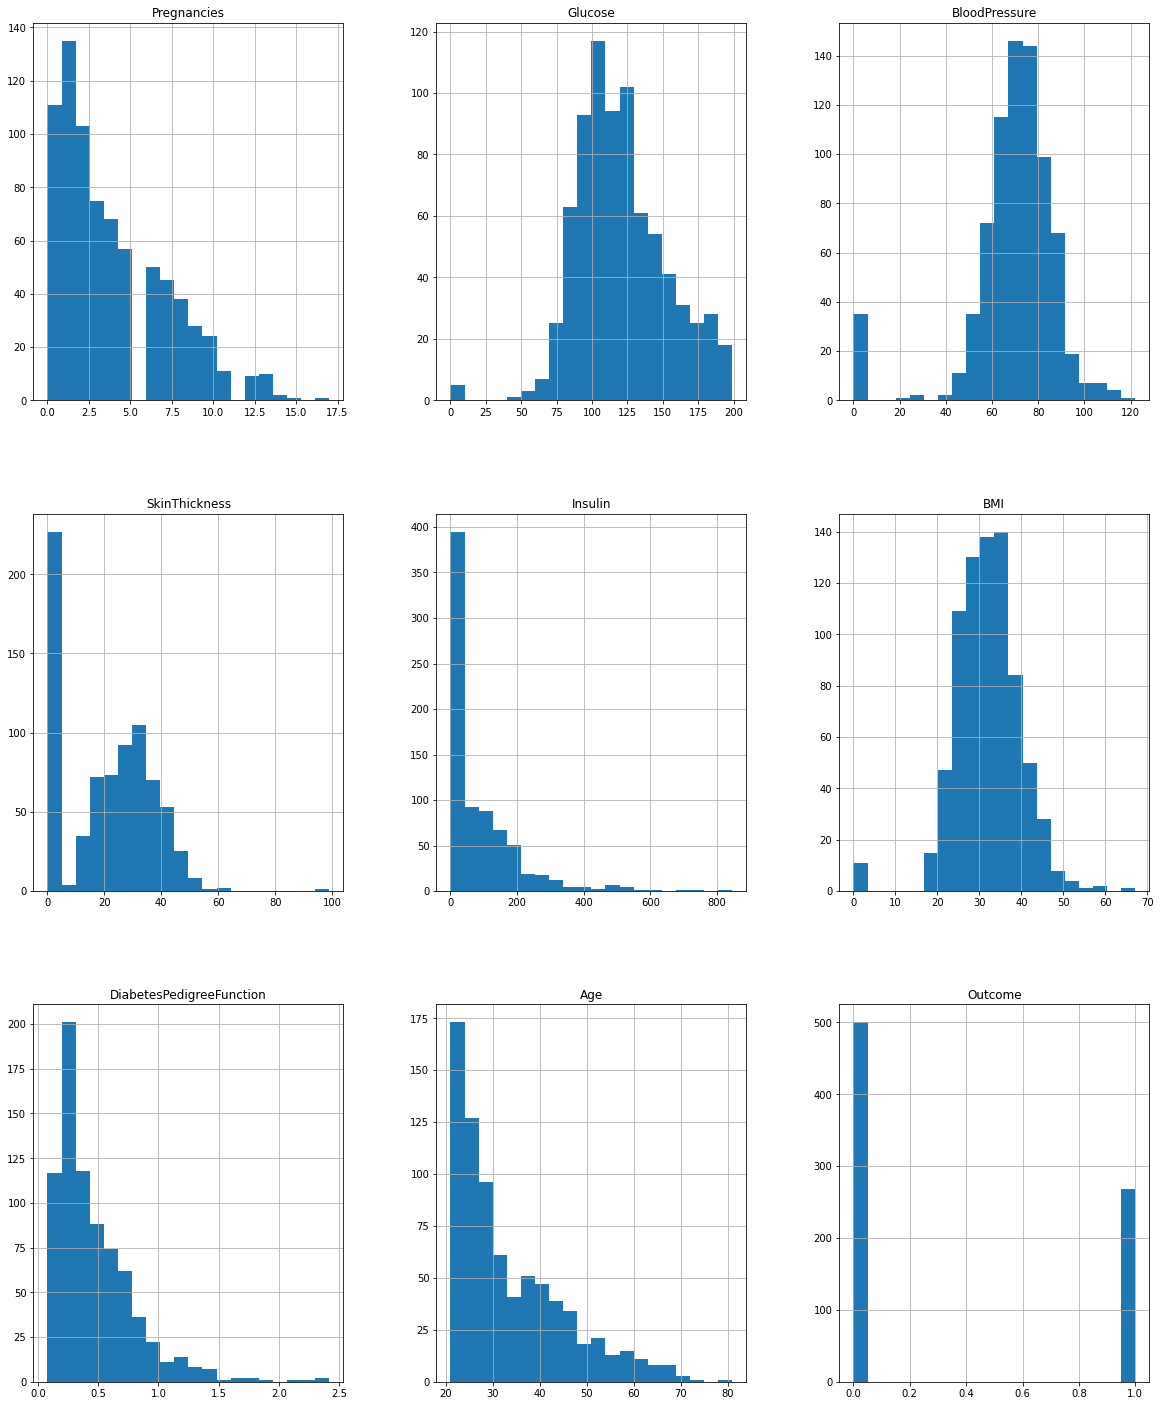

In [10]:
#histogram
%matplotlib inline
dataset.hist(bins=20, figsize=(20,25))
plt.show()

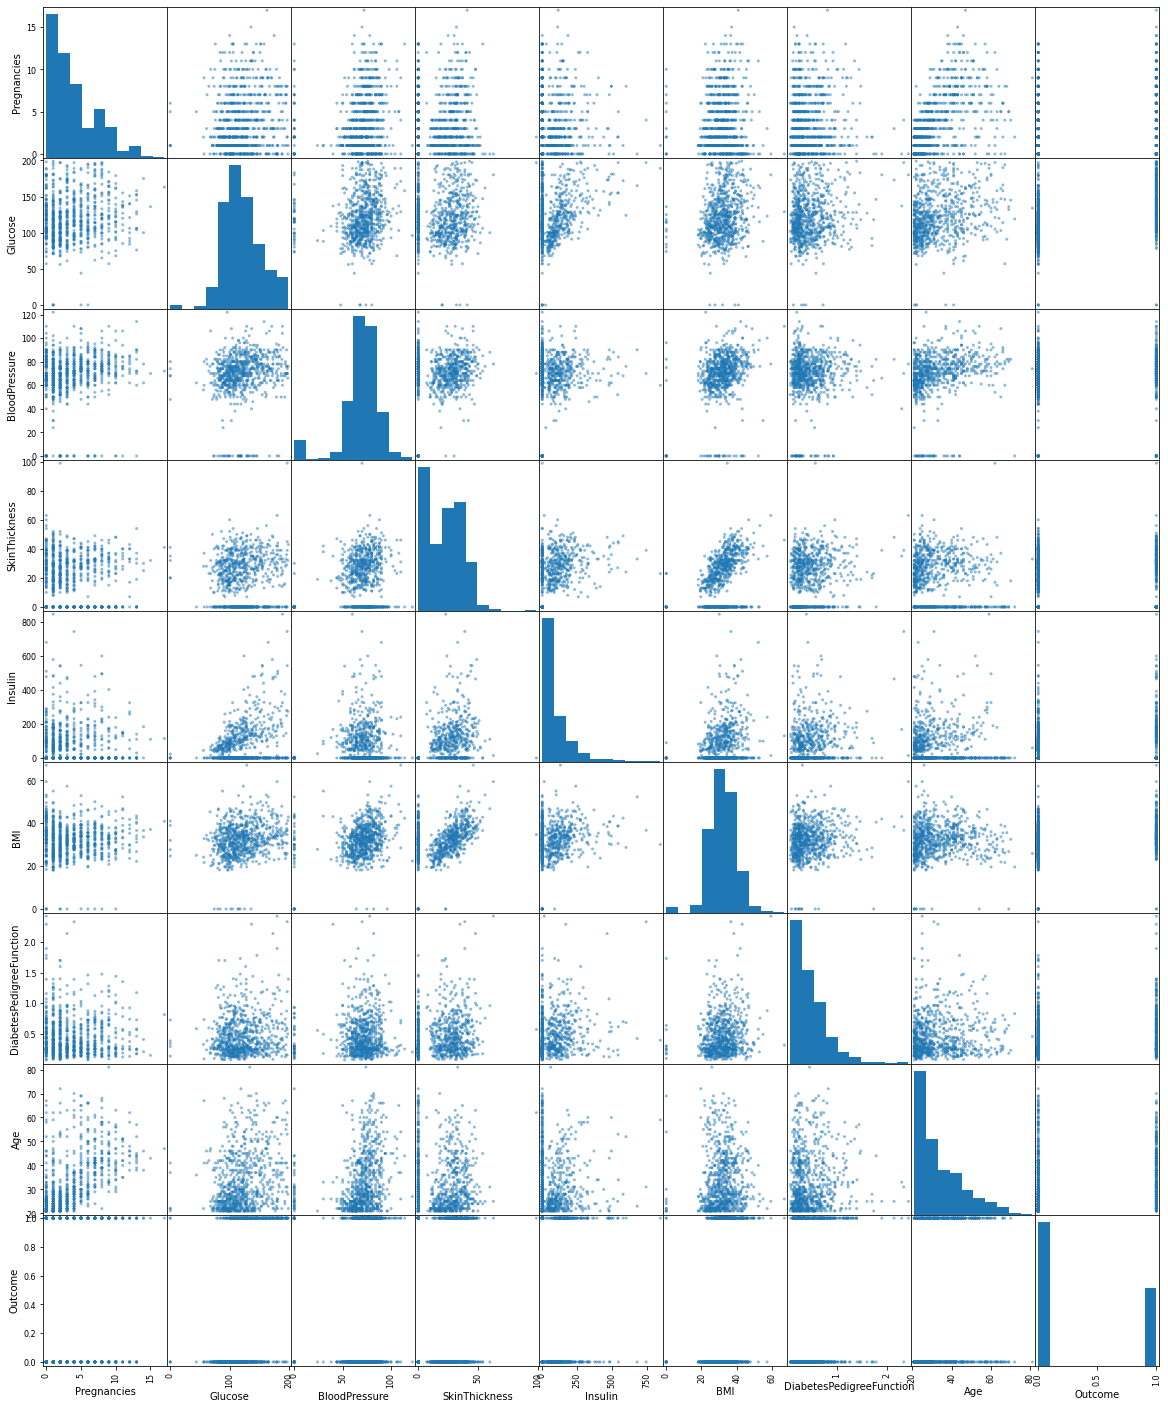

In [11]:
#scatter plot
from pandas.plotting import scatter_matrix
scatter_matrix(dataset, figsize = (20,25))
plt.show()

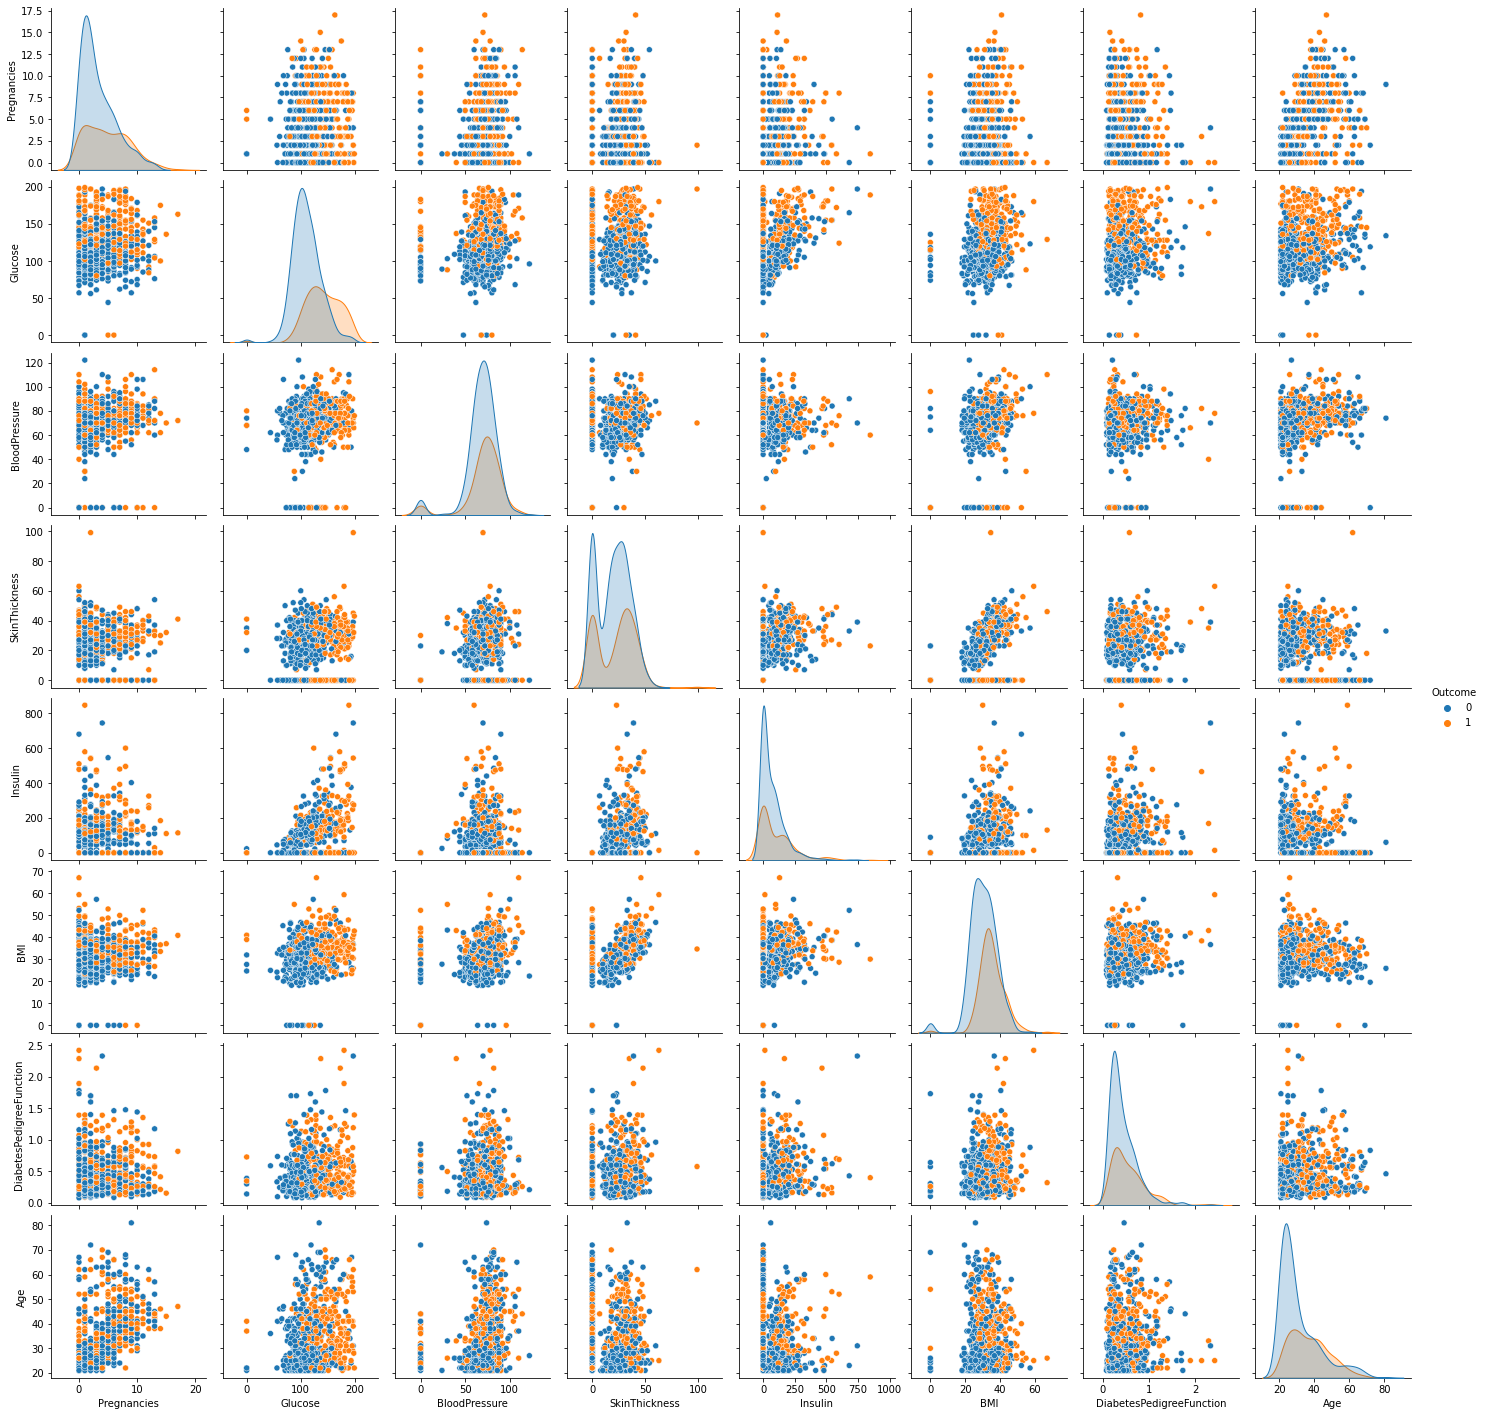

In [12]:
#pair plot
sns.pairplot(data = dataset, hue = 'Outcome')
plt.show()

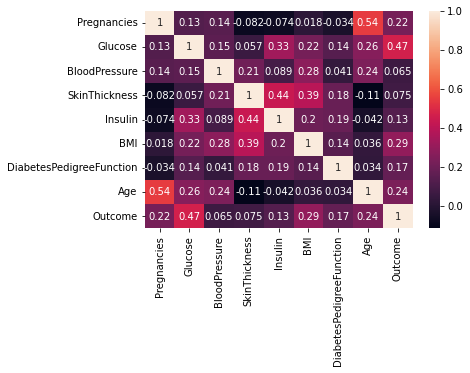

In [16]:
#Heatmap
sns.heatmap(dataset.corr(), annot = True)
plt.show()

In [17]:
#The countplot tells us that the dataset is imbalanced, as number of patients who don't have diabetes is more than those who do.

In [18]:
X = dataset.drop(columns = 'Outcome', axis = 1)

In [19]:
Y = dataset['Outcome']

In [20]:
print(X)
print(Y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


# Standardization

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
standarized_dataset = sc.transform(X)
standarized_dataset

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [26]:
X = standarized_dataset
Y = dataset['Outcome']

# Train Test Split

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,stratify=Y,random_state=2)

# Training the model

In [30]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [32]:
#K nearest neighbors Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 24)#, metric = 'minkowski' , p = 2)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=24)

In [33]:
#Support Vector Machine
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 42)
svc.fit(X_train, Y_train)

SVC(kernel='linear', random_state=42)

In [35]:
#Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, Y_train)

GaussianNB()

In [67]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dectree.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [68]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
ranfor = RandomForestClassifier(n_estimators = 11, criterion = 'entropy', random_state = 42)
ranfor.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=11, random_state=42)

# Prediction and accuracy score on train data

In [69]:
from sklearn.metrics import accuracy_score

In [70]:
#Logestic Regression
X_train_prediction_log = model.predict(X_train)
training_data_accuracy_log = accuracy_score(X_train_prediction_log,Y_train)

In [71]:
#KNN
X_train_prediction_knn = knn.predict(X_train)
training_data_accuracy_knn = accuracy_score(X_train_prediction_knn,Y_train)

In [72]:
#SVM
X_train_prediction_svm = svc.predict(X_train)
training_data_accuracy_svm = accuracy_score(X_train_prediction_svm,Y_train)

In [73]:
#Naive Bayes
X_train_prediction_nb = nb.predict(X_train)
training_data_accuracy_nb = accuracy_score(X_train_prediction_nb,Y_train)

In [74]:
#Decision Tree
X_train_prediction_dectree = dectree.predict(X_train)
training_data_accuracy_dectree = accuracy_score(X_train_prediction_dectree,Y_train)

In [75]:
#Random Forest
X_train_prediction_ranfor = ranfor.predict(X_train)
training_data_accuracy_ranfor = accuracy_score(X_train_prediction_ranfor,Y_train)

# Accuracy score on train data

In [76]:
print('Logistic Regression: ',training_data_accuracy_log)
print('K Nearest Neighbours: ',training_data_accuracy_knn)
print('Support Vector Machine: ',training_data_accuracy_svm)
print('Naive Bayes: ',training_data_accuracy_nb)
print('Decision Tree: ',training_data_accuracy_dectree)
print('Random Forest: ',training_data_accuracy_ranfor)

Logistic Regression:  0.7777777777777778
K Nearest Neighbours:  0.78125
Support Vector Machine:  0.7881944444444444
Naive Bayes:  0.7604166666666666
Decision Tree:  1.0
Random Forest:  0.9895833333333334


# Prediction and accuracy score on test data

In [50]:
#Logestic Regression
X_test_prediction_log = model.predict(X_test)
testing_data_accuracy_log = accuracy_score(X_test_prediction_log,Y_test)

In [55]:
#KNN
X_test_prediction_knn = knn.predict(X_test)
testing_data_accuracy_knn = accuracy_score(X_test_prediction_knn,Y_test)

In [58]:
#SVM
X_test_prediction_svm = svc.predict(X_test)
testing_data_accuracy_svm = accuracy_score(X_test_prediction_svm,Y_test)

In [56]:
#Naive Bayes
X_test_prediction_nb = nb.predict(X_test)
testing_data_accuracy_nb = accuracy_score(X_test_prediction_nb,Y_test)

In [61]:
#Decision Tree
X_test_prediction_dectree = dectree.predict(X_test)
testing_data_accuracy_dectree = accuracy_score(X_test_prediction_dectree,Y_test)

In [62]:
#Random Forest
X_test_prediction_ranfor = ranfor.predict(X_test)
testing_data_accuracy_ranfor = accuracy_score(X_test_prediction_ranfor,Y_test)

# Accuracy score on train data

In [63]:
print('Logistic Regression: ',testing_data_accuracy_log)
print('K Nearest Neighbours: ',testing_data_accuracy_knn)
print('Support Vector Machine: ',testing_data_accuracy_svm)
print('Naive Bayes: ',testing_data_accuracy_nb)
print('Decision Tree: ',testing_data_accuracy_dectree)
print('Random Forest: ',testing_data_accuracy_ranfor)

Logistic Regression:  0.765625
K Nearest Neighbours:  0.71875
Support Vector Machine:  0.765625
Naive Bayes:  0.765625
Decision Tree:  0.6614583333333334
Random Forest:  0.7395833333333334
